In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

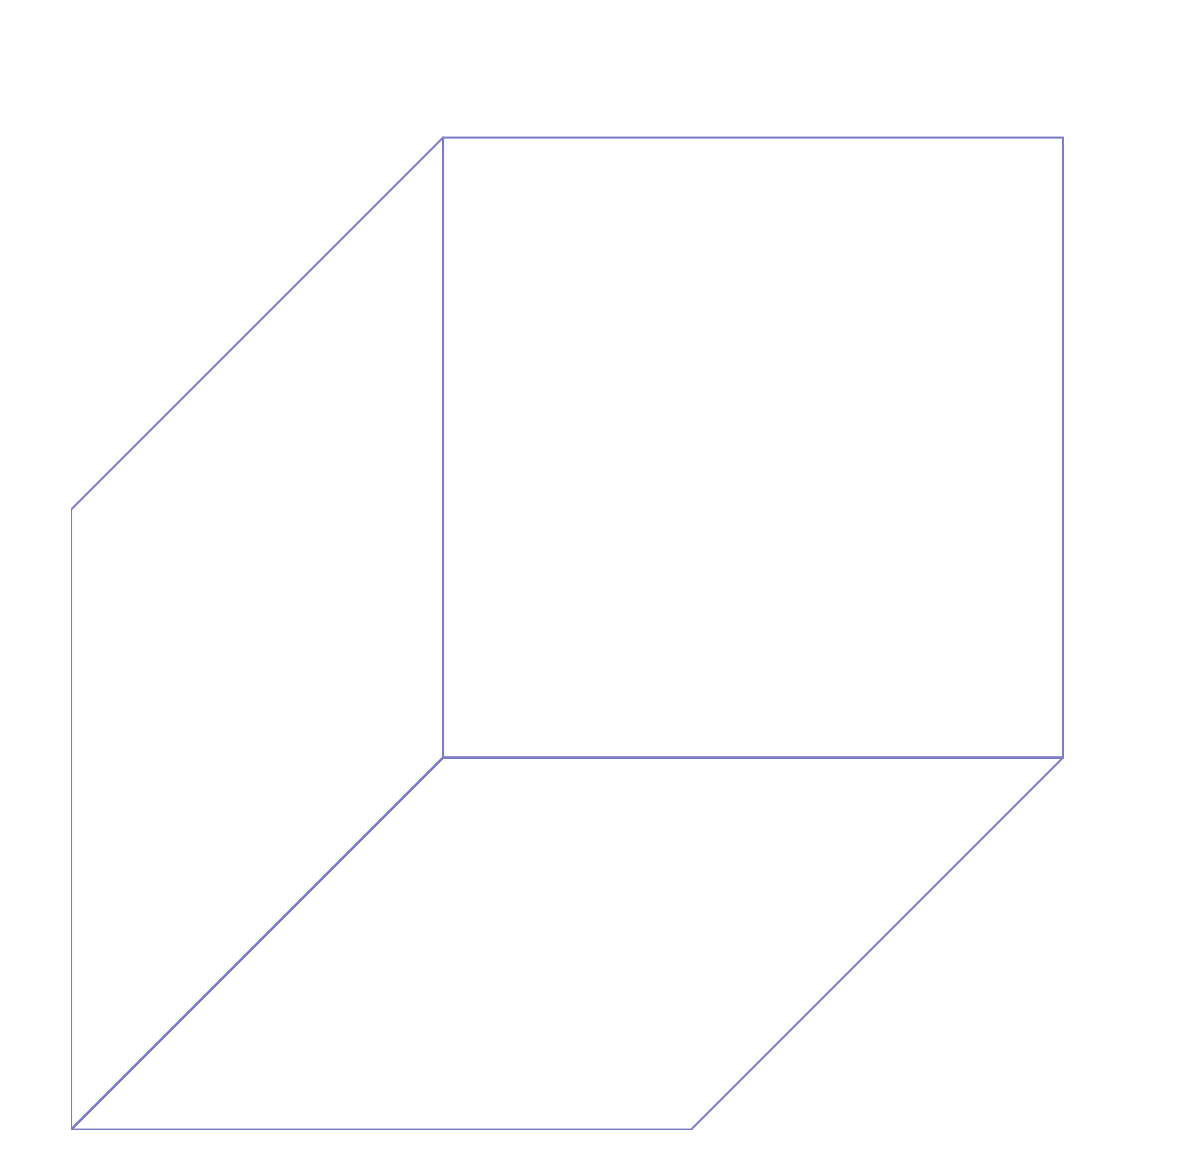

In [21]:
def rep(x):
    return np.array(x).reshape(-1,1).repeat([2], axis=1)

bbox = np.array([[0,1,1,0,0, 0,0,0,0, 1,1,0,0], [0,0,1,1,0, 0,1,1,0, 0,0,0,0], [0,0,0,0,0, 1,1,0,0, 0,1,1,0]])

def plot3d(x, y, z, marcador='-', box=True):
    ex = np.array([1,0])
    ey = np.array([0,1])
    ez = np.array([-.6,-.6])
    x, y = (rep(x) * ex + rep(y) * ey + rep(z) * ez).T
    plt.figure(figsize=(10,10))
    plt.axis('off')
    if box:
        a,b,c=bbox
        x1,y1 = (rep(a) * ex + rep(b) * ey + rep(c) * ez).T
        plt.plot(x1,y1,'k-', x,y,marcador,alpha=.3)
    else:
        plt.plot(x, y, marcador, alpha=.3)

plot3d(*bbox, '-')
#bbox.T

In [85]:
def _normaliza(x):
    "traslada a [0,1] los valores de x"
    x = np.array(x)
    minx, maxx = np.min(x), np.max(x)
    return (x-minx) / (maxx-minx)

def jcaos(A, y, marcador):
    "A=vértices a elegir, y=arreglo de índices para esos vértices"
    B = A[y,:] # selecciona los vértices
    # crea una ufunc que calcula el promedio de dos valores (en este caso, puntos 2D)
    prom = np.frompyfunc(lambda x,y:(x+y)/2, 2, 1)
    # Calcula el prom acumulado
    C = prom.accumulate(B, dtype=np.object).astype(np.float)
    x,y,z = C.T # separa en arreglos las coord.
    plot3d(x,y,z,marcador)

def cubo(x, n=8, marcador=",", normaliza=True):
    """Juego del Caos para serie de tiempo x sobre un cubo.

    Parámetros:
        x -- serie de tiempo
        n -- número de vértices (default 8)
        marcador -- in [,.ox^-] (default ',')
        normaliza -- False ssi x[i] in [0,1] (default True)
    """
    if normaliza:
        x=_normaliza(x)
    # clasifica x por sus valores creando arreglos booleanos
    booleanos=[0]
    for i in range(1,n-1):
        booleanos.append((x>=i/n) & (x<(i+1)/n))
    booleanos.append(x>(n-1)/n)
    # crea arreglo de 0s, 1s, 2s, 3s como índices para seleccionar vértices
    y = np.zeros_like(x, dtype=np.int8) # selecciona por default vértice con índice 0
    for i in range(1,n):
        y[booleanos[i]]=i
    # 1er vértice del n-agono
    A = np.array([[0,0,0],[1,0,0],[1,1,0],[0,1,0],[0,0,1],[1,0,1],[1,1,1],[0,1,1]])
    jcaos(A, y, marcador)
    
%config InlineBackend.figure_format = 'retina'

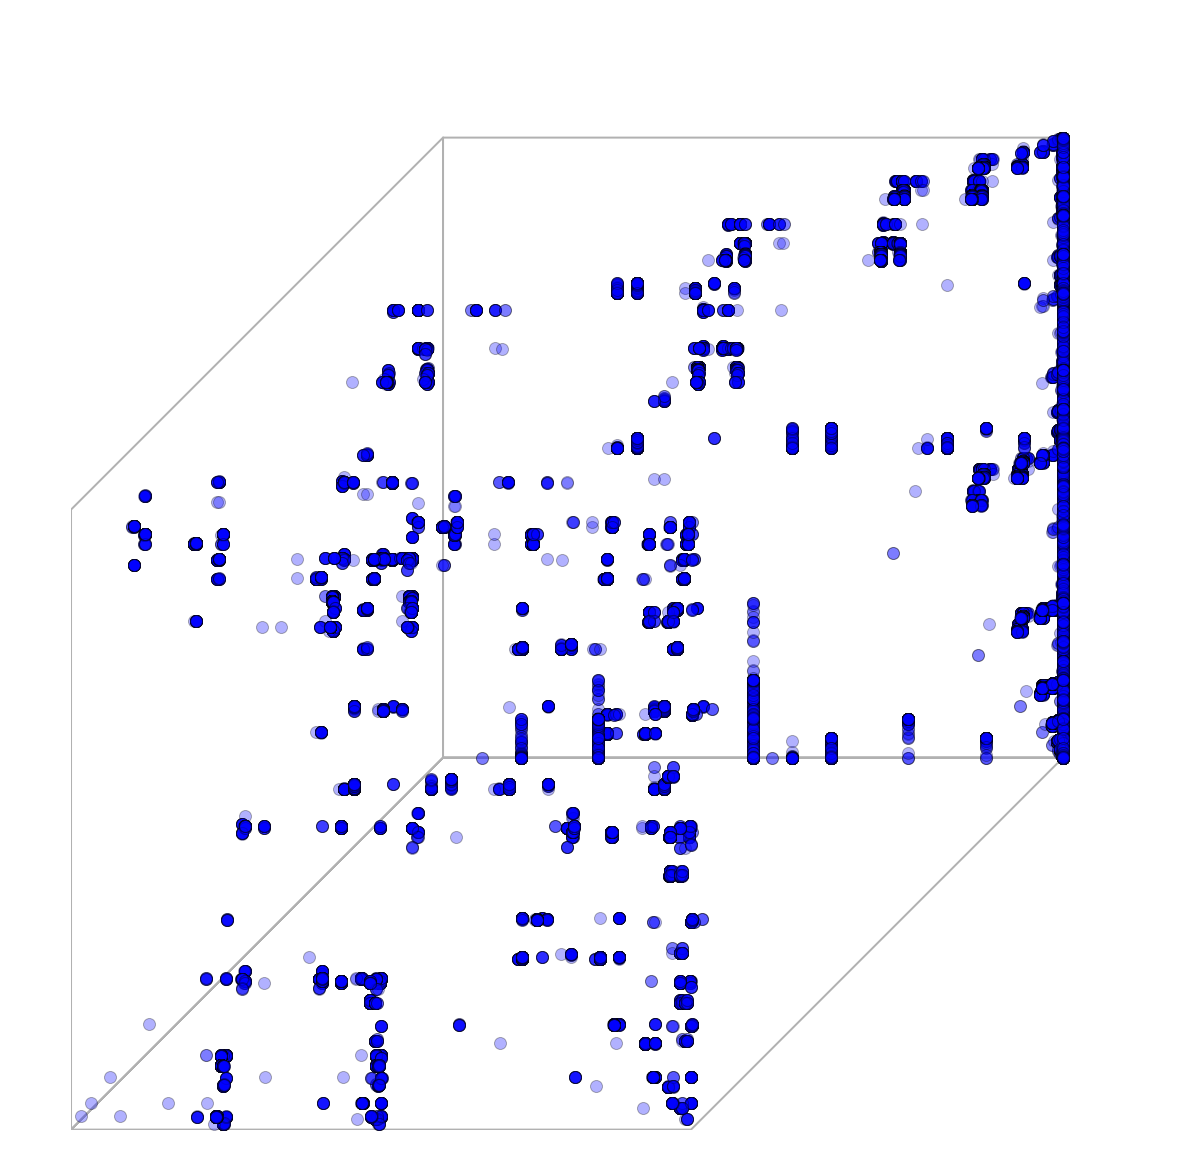

In [80]:
import pandas as pd
xu = np.random.rand(1000000)  # aleatorios distr uniforme
xn = np.random.randn(100000) # aleatorios distr normal
x_lig = pd.read_csv("pach/Serie_ligeros.txt", header=None)[0]
x_pes = pd.read_csv("pach/Serie_pesados.txt", header=None)[0]
cubo(x_lig, marcador='o')

In [82]:
%store -r xlog

In [83]:
xlog

array([ 0.6114156 ,  0.95034625,  0.18875301, ...,  0.30634441,
        0.84999005,  0.51002785])

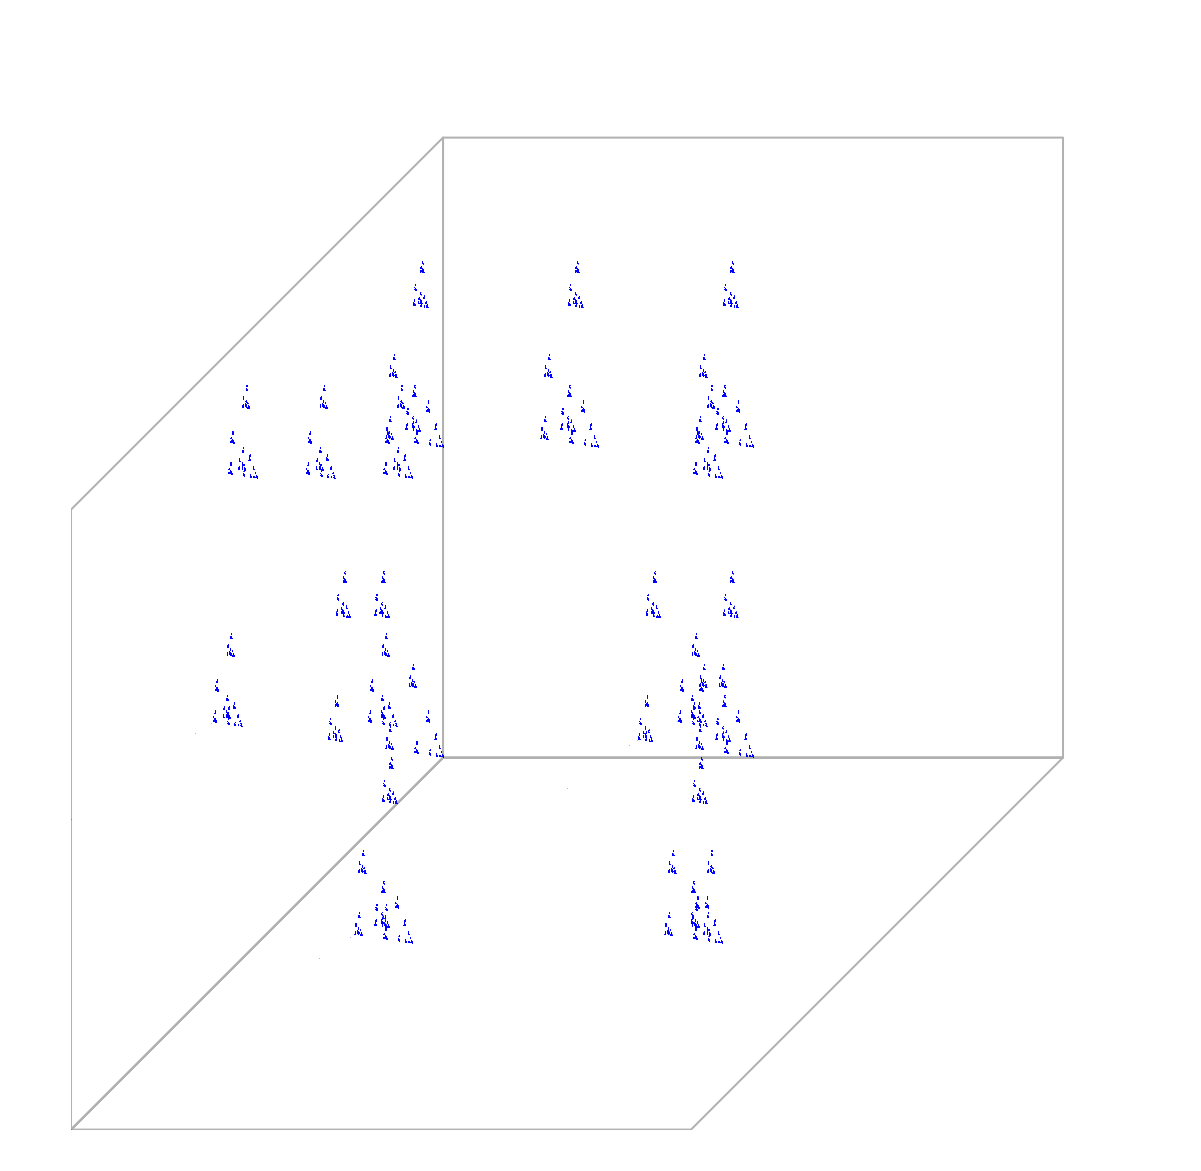

In [90]:
cubo(xlog)